In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 1.0 MB/s eta 0:00:0000:0100:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached libclang-16.0.0-py2.py3-none-macosx_10_9_x86_64.whl (26.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 1.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x = []
y = []

### loading data
labels = {'neutral': 0,
          'happiness': 1,
          'surprise': 2,
          'sadness': 3,
          'anger': 4,
          'disgust': 5,
          'fear': 6,
          'contempt': 7}

for label in labels:
    print(label)
    for filename in os.listdir("FER+/emotion_data/" + label):
        if (
            filename.split(".").pop().lower() == "png"
        ):
            img = load_img(
                "FER+/emotion_data/" + label + "/" + filename,
                target_size=(48, 48),
                color_mode="grayscale",
            )
            img = img_to_array(img)
            img = img / 255.0
            x.append(img)
            y.append(labels[label])

x = np.array(x)


2023-06-01 22:52:42.796240: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


neutral
happiness
surprise
sadness
anger
disgust
fear
contempt


In [3]:
x

array([[[[0.50980395],
         [0.42745098],
         [0.3882353 ],
         ...,
         [0.39215687],
         [0.44705883],
         [0.56078434]],

        [[0.5176471 ],
         [0.4745098 ],
         [0.45882353],
         ...,
         [0.41960785],
         [0.34901962],
         [0.36862746]],

        [[0.5647059 ],
         [0.49019608],
         [0.49411765],
         ...,
         [0.52156866],
         [0.41568628],
         [0.34901962]],

        ...,

        [[0.6039216 ],
         [0.6039216 ],
         [0.6039216 ],
         ...,
         [0.78431374],
         [0.8039216 ],
         [0.8117647 ]],

        [[0.6039216 ],
         [0.6039216 ],
         [0.6039216 ],
         ...,
         [0.7921569 ],
         [0.8039216 ],
         [0.79607844]],

        [[0.6039216 ],
         [0.6039216 ],
         [0.6039216 ],
         ...,
         [0.78431374],
         [0.79607844],
         [0.7921569 ]]],


       [[[0.5529412 ],
         [0.6392157 ],
         [0.67

In [4]:
# # Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle= True)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 8

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))


opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/Users/BlueItMy03/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("run app/model.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=15, batch_size=64, callbacks=callbacks_list)
scores = model.evaluate(x_test, y_test)
##print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/15
500/500 [==============================] - ETA: 0s - loss: 1.7519 - accuracy: 0.3644
Epoch 1: accuracy improved from -inf to 0.36435, saving model to run app/model.h5
500/500 [==============================] - 504s 1s/step - loss: 1.7519 - accuracy: 0.3644 - lr: 1.0000e-04
Epoch 2/15
500/500 [==============================] - ETA: 0s - loss: 1.4613 - accuracy: 0.4820
Epoch 2: accuracy improved from 0.36435 to 0.48204, saving model to run app/model.h5
500/500 [==============================] - 516s 1s/step - loss: 1.4613 - accuracy: 0.4820 - lr: 1.0000e-04
Epoch 3/15
500/500 [==============================] - ETA: 0s - loss: 1.3195 - accuracy: 0.5373
Epoch 3: accuracy improved from 0.48204 to 0.53727, saving model to run app/model.h5
500/500 [==============================] - 494s 989ms/step - loss: 1.3195 - accuracy: 0.5373 - lr: 1.0000e-04
Epoch 4/15
500/500 [==============================] - ETA: 0s - loss: 1.2200 - accuracy: 0.5724
Epoch 4: accuracy improved from 0.53727 

NameError: name 'history' is not defined

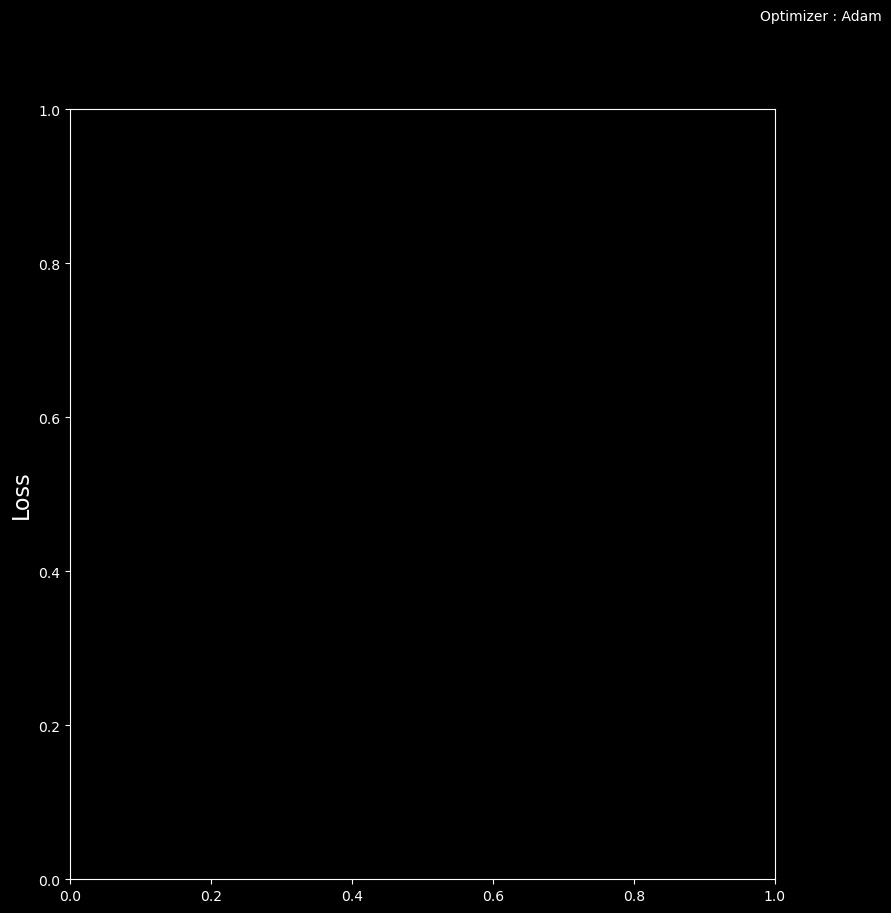